In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /=255
x_test /=255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))


In [8]:
#https://keras.io/api/optimzers/
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2066 - accuracy: 0.9371
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0847 - accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0575 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0429 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0367 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0287 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0252 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0221 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0201 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0576 - accuracy: 0.9853


[0.05759001895785332, 0.9853000044822693]

6


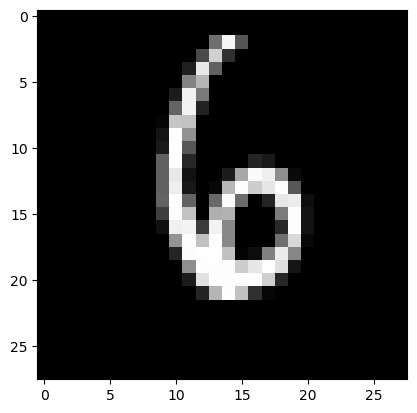

In [10]:
import matplotlib.pyplot as plt

image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
predict = x_test[image_index].reshape(1, 28, 28, 1)
pred = model.predict(predict)
print(pred.argmax())
